In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from scipy import stats
from scipy.stats import f_oneway

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

# PART 1

# Univariate analysis

1.1 Univariate analysis: consider features separately, their distribution, descriptive statistics, anomalies, omissions, etc. (15%)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None of the columns has null values

There are categorical values, lets explore it by drawing barchart

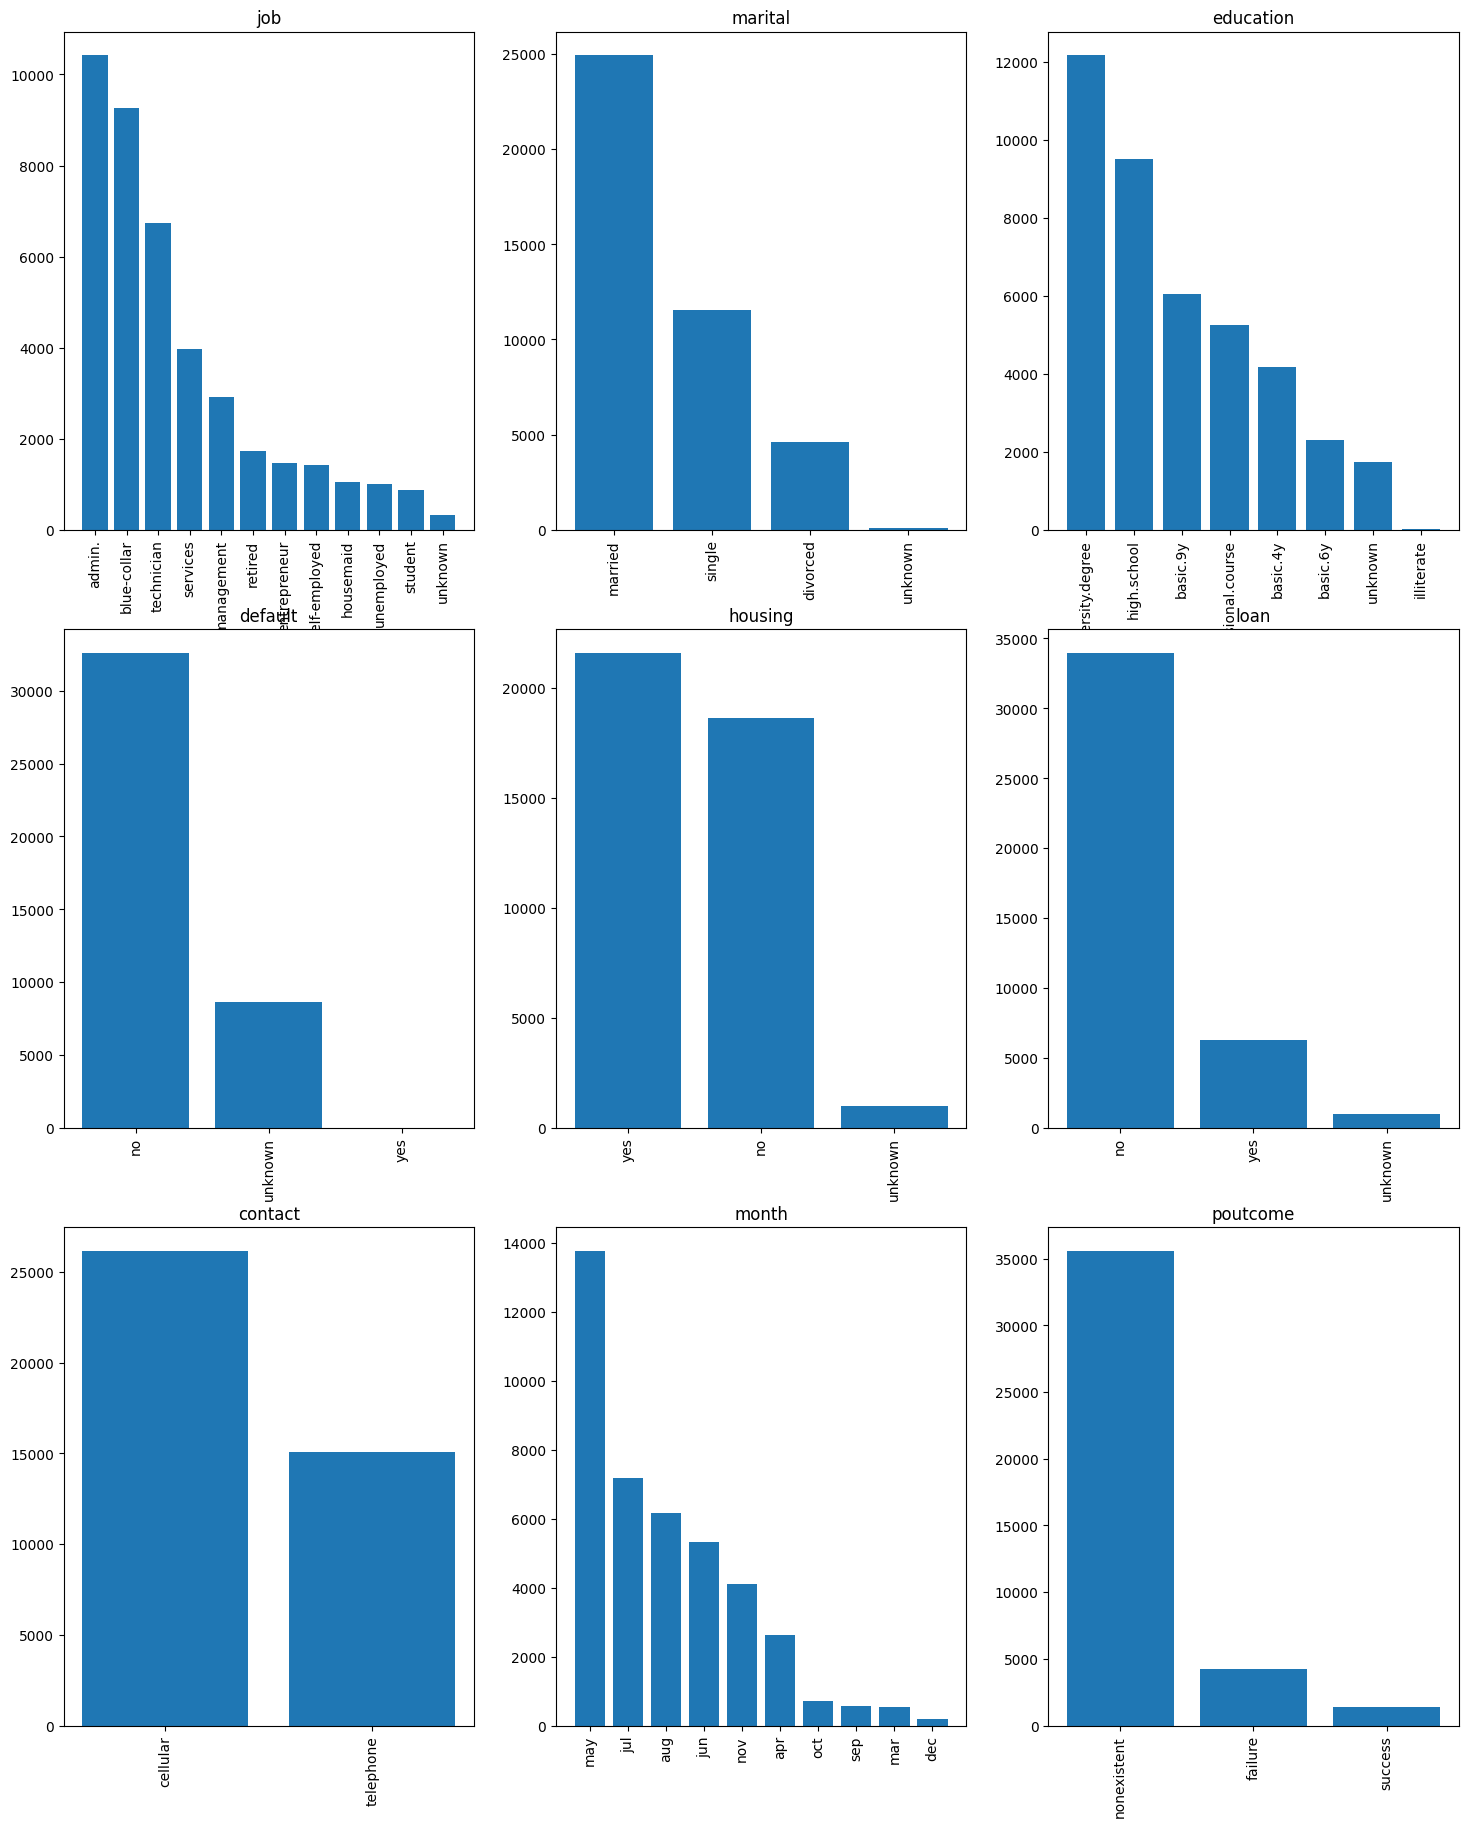

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(18, 22))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axs[trace_x, trace_y].set_title(cat_column)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.show()

There is nothing very noticable, except that there are some unknown values in housing and loan

Now lets plot histogram for numerical values

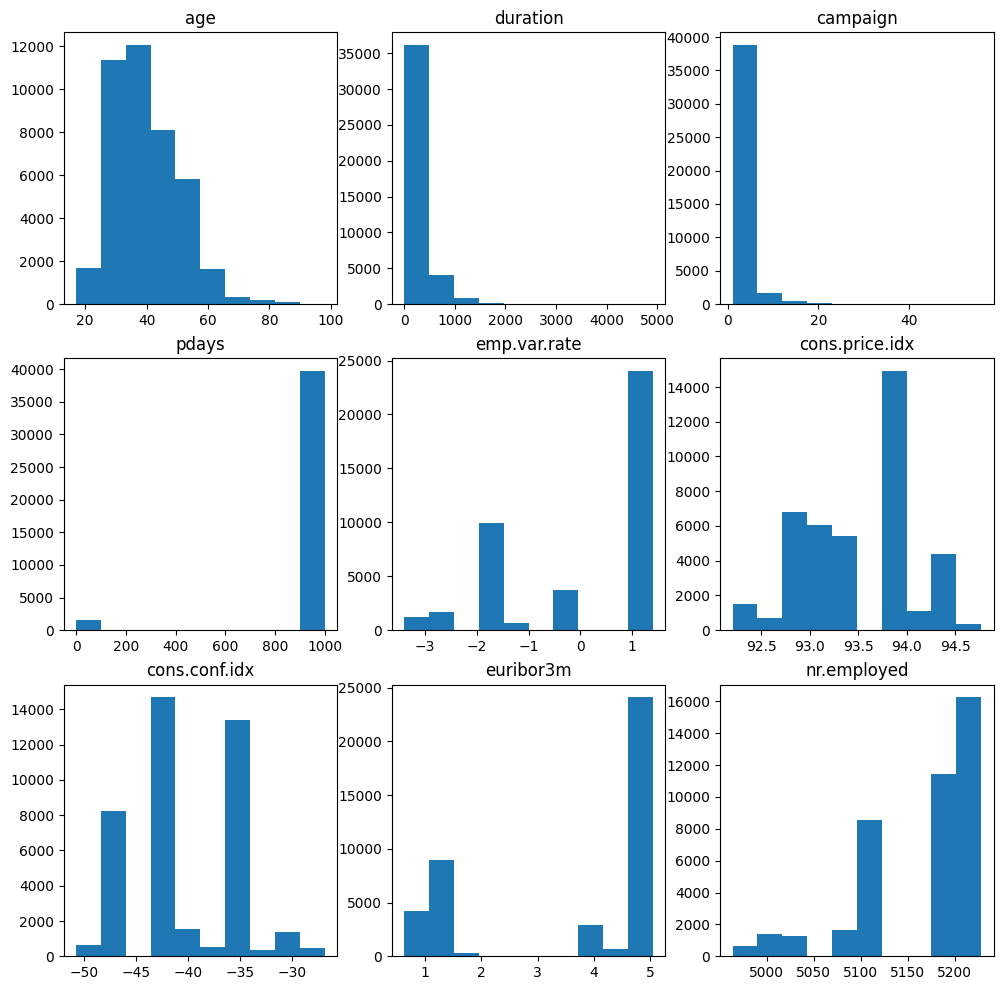

In [ ]:
num_columns = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(12, 12))

counter = 0
for num_column in num_columns:

    trace_x = counter // 3
    trace_y = counter % 3

    axs[trace_x, trace_y].hist(df[num_column])

    axs[trace_x, trace_y].set_title(num_column)

    counter += 1

plt.show()

We see that there are possible outliers in age, duration pdays, and campaign columns.

Lets plot see how data are lied under normal distribution and boxplot.

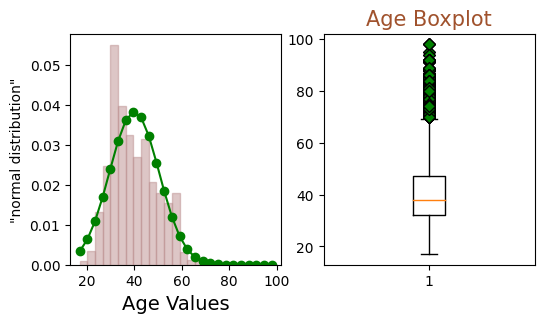

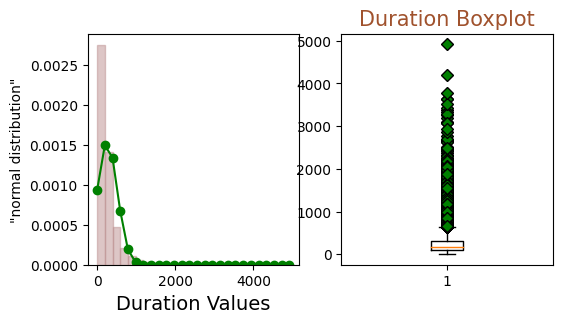

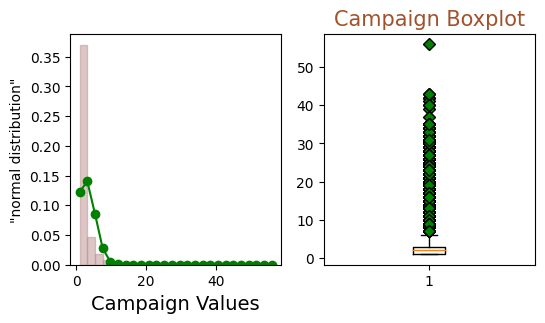

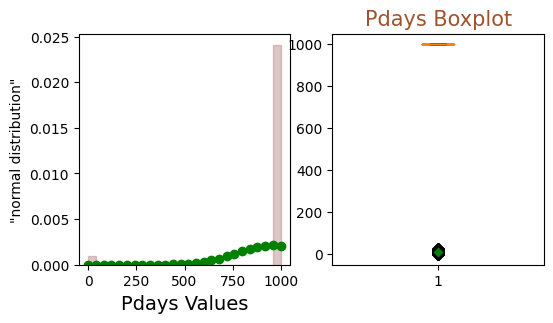

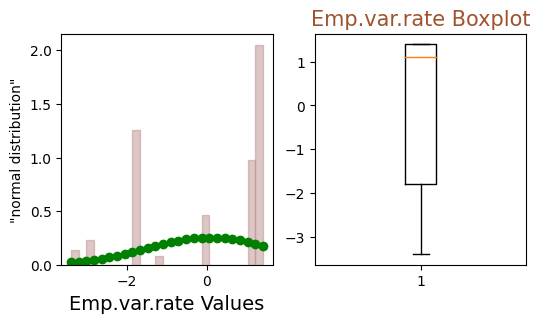

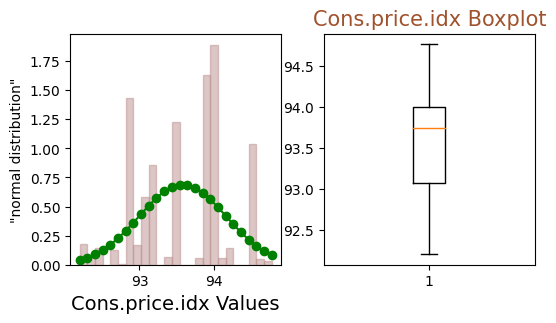

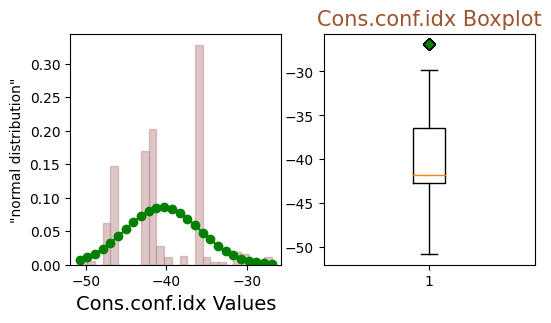

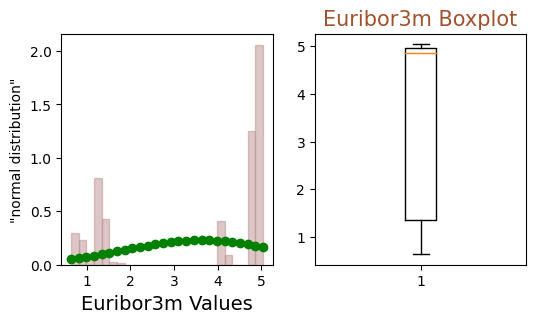

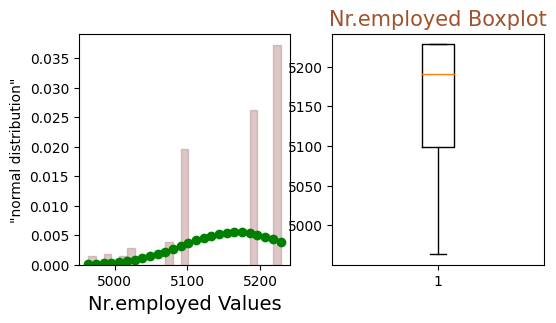

In [ ]:
selectColumns = list(['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])

for column in selectColumns:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

    _, bins, _ = ax1.hist(df[column], bins = 25,
                          density = 1, alpha = 0.5,
                          color = 'rosybrown',
                          ec= 'rosybrown' )

    mu, sigma = stats.norm.fit(df[column])
    best_fit_line = stats.norm.pdf(bins, mu, sigma)

    ax1.plot(bins, best_fit_line, 'g-o')

    ax1.set_ylabel('"normal distribution"')
    ax1.set_xlabel(column.capitalize() + " Values",fontsize=14)

    green_diamond = dict(markerfacecolor='g', marker='D')
    ax2.boxplot(df[column],flierprops=green_diamond)

    ax2.set_title(column.capitalize() + " Boxplot",
                  fontdict=dict(
                  family="DejaVu Sans",
                  size=15,
                  color="sienna"))
    plt.show()

We see that none of features lie on normal distribution, and there are confirmation of outliers in age, duration, campaign, pdays

Lets inspect them little closer

In [ ]:
df[['age', 'pdays', 'campaign', 'duration']].describe()

,age,pdays,campaign,duration
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,962.475454,2.567593,258.285010
std,10.42125,186.910907,2.770014,259.279249
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,999.000000,1.000000,102.000000
50%,38.00000,999.000000,2.000000,180.000000
75%,47.00000,999.000000,3.000000,319.000000
max,98.00000,999.000000,56.000000,4918.000000


How many people were not previously contacted:

In [ ]:
len (df[df['pdays'] == 999] )

39673

Percentage of campaign values above 15:

In [ ]:
len (df[df['campaign'] > 15] ) / len(df) * 100

0.8619015247159366

These are noisy values that needs to be changed to mean values

Percentage of durations that are greater than 2000:

In [ ]:
len (df[df['duration'] > 2000] ) / len(df) * 100

0.1456734971350879

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

All the columns do not have null values

**1.2 Multivariate analysis**

# Multivariate Analysis

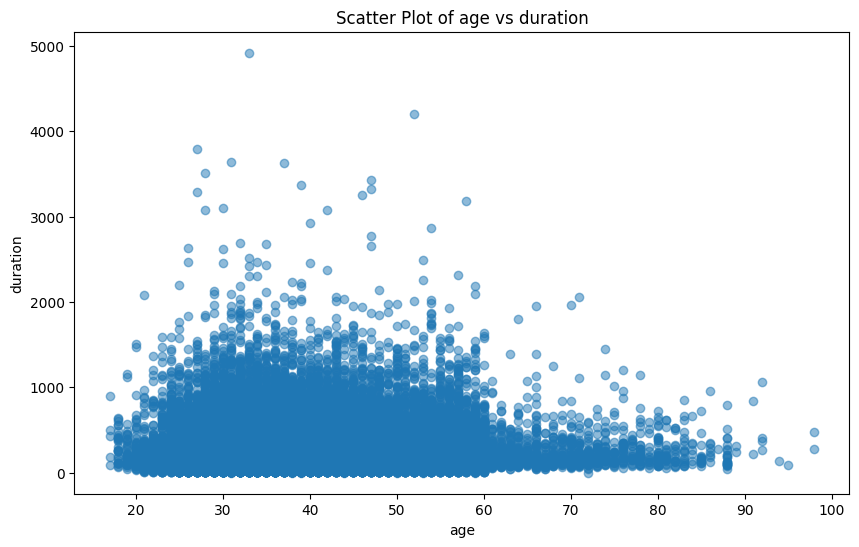

In [ ]:
pairs_of_columns = [('age', 'duration')]

for col_a, col_b in pairs_of_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[col_a], df[col_b], alpha=0.5)
    plt.title(f'Scatter Plot of {col_a} vs {col_b}')
    plt.xlabel(col_a)
    plt.ylabel(col_b)
    plt.show()

People older than 60 did not have duration more than 1000 seconds, and most people more than 2000 people from around 20 - 60 years old

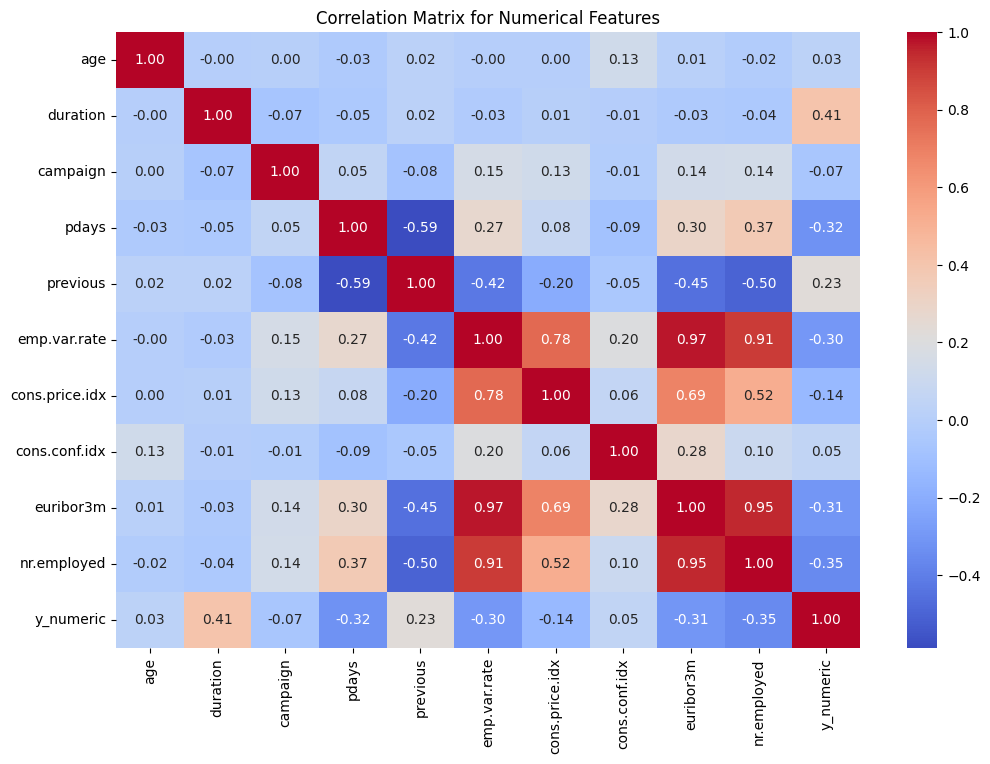

In [ ]:
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

There are strong correlations between euribor3m and emp.var.rate and between nr.employed and euribor3m.

There are also weaker correlations of 0.78, 0.69, 0.52  between (cons.conf.idx, emp.var.rate) and (euribor3m, cons.price.idx) and (nr.employed, cons.price.idx)

RELATION BETWEEN NUMERICAL VALUES

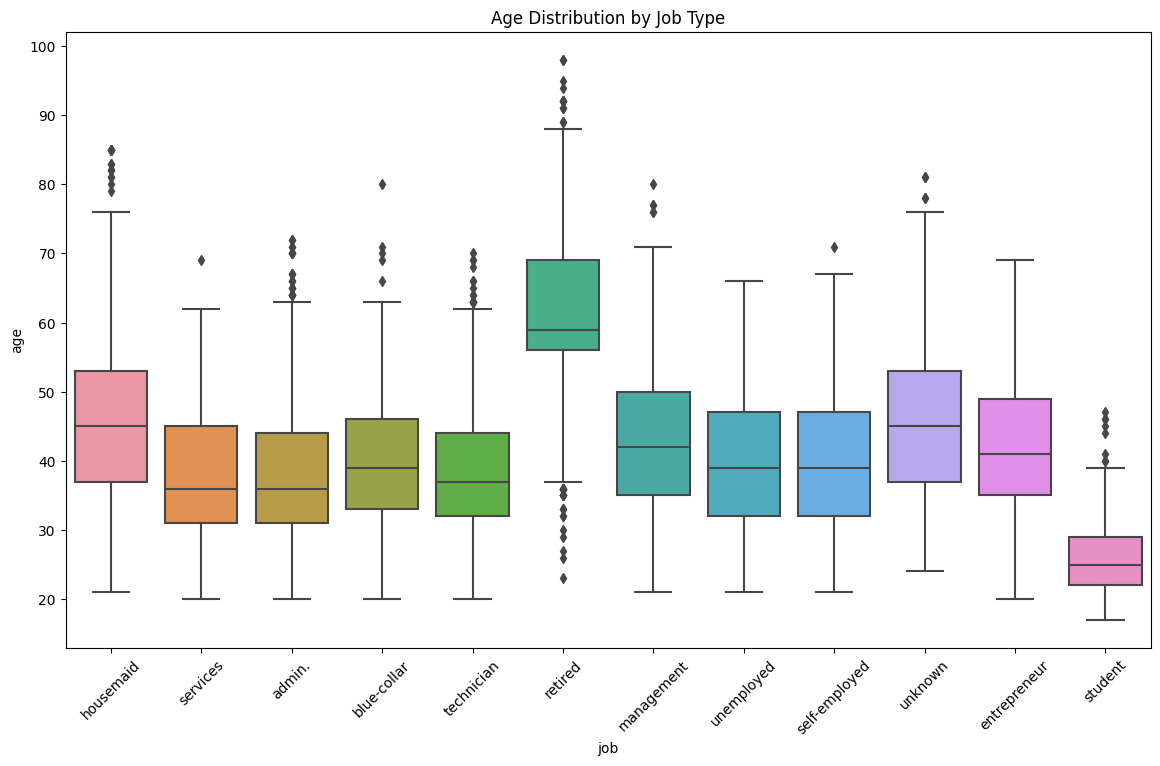

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='job', y='age', data=df)
plt.title('Age Distribution by Job Type')
plt.xticks(rotation=45)
plt.show()

There are outliers of age in each job category, mostly in retired category.

Most outliers lie above the boxplot of each job category

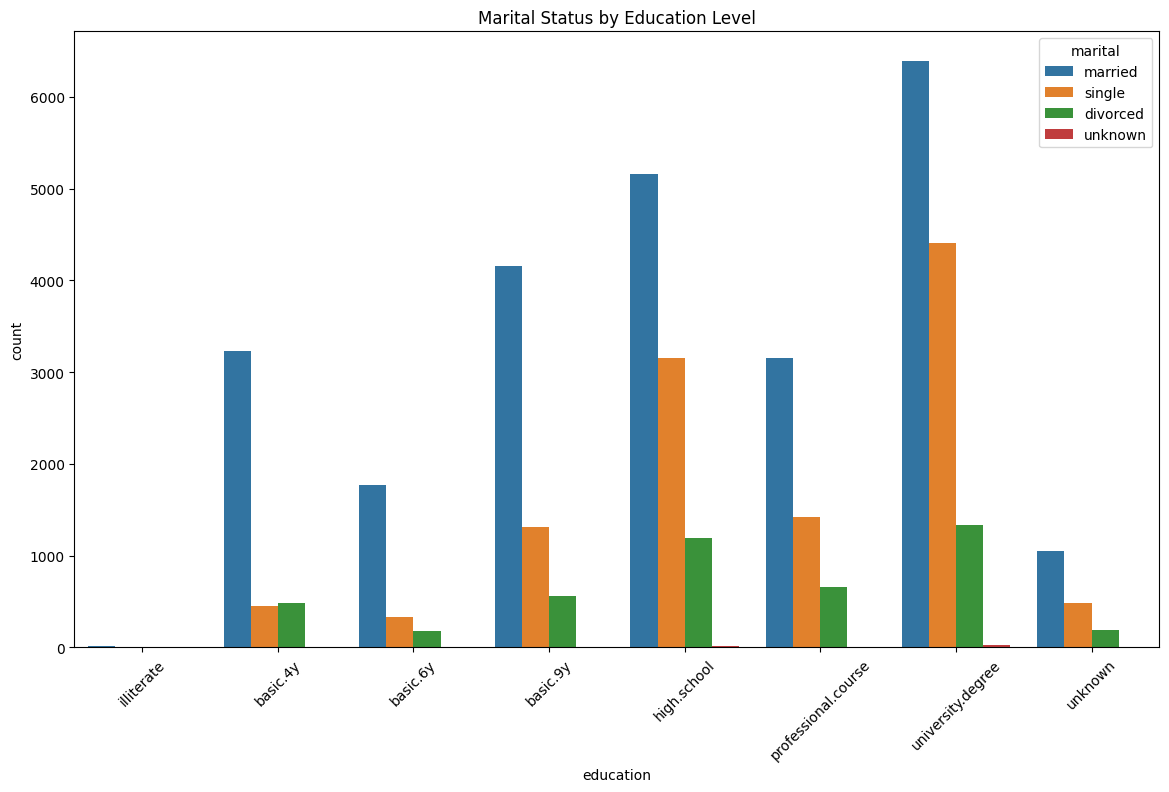

In [ ]:
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown']
plt.figure(figsize=(14, 8))
sns.countplot(x='education', hue='marital', data=df, order=education_order)
plt.title('Marital Status by Education Level')
plt.xticks(rotation=45)
plt.show()

Most people in the dataset are people who are married, single, and divorced have university degree

# PART 2

**PART 2**

Fill missing values

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')

In [ ]:
df[numeric_columns] = num_imputer.fit_transform(df[numeric_columns])
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

DEAL with outliers

In [ ]:
z_scores = stats.zscore(df[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

Prepare categorical and numerical data if needed, explain the selected strategy

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)])

df_preprocessed = preprocessor.fit_transform(df)

# Part 3

PART 3

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

I am going to use PCA because it will help to reduce the dimensionality and keep as much variance as possible.The parameter n_components=0.95 to preserve 95% of the total variance in the data. This threshold is chosen to strike a balance between reducing dimensionality (for simplicity and to potentially remove noise) and retaining enough information for analysis.

In [ ]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_result = pca.fit_transform(df_preprocessed)

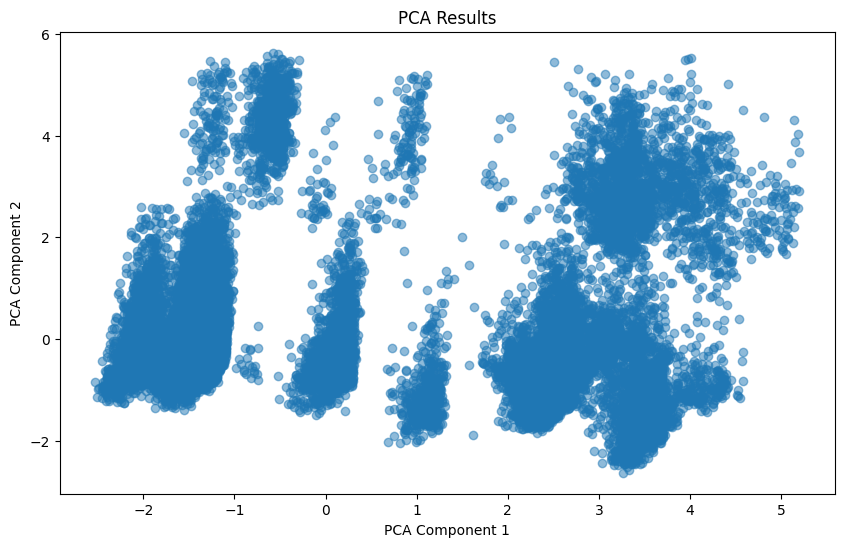

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance by PCA: {explained_variance:.2f}")

Explained Variance by PCA: 0.95


Also i will use t-SNE because it will visualise high dimensional data to find the clusters or groups

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_preprocessed)

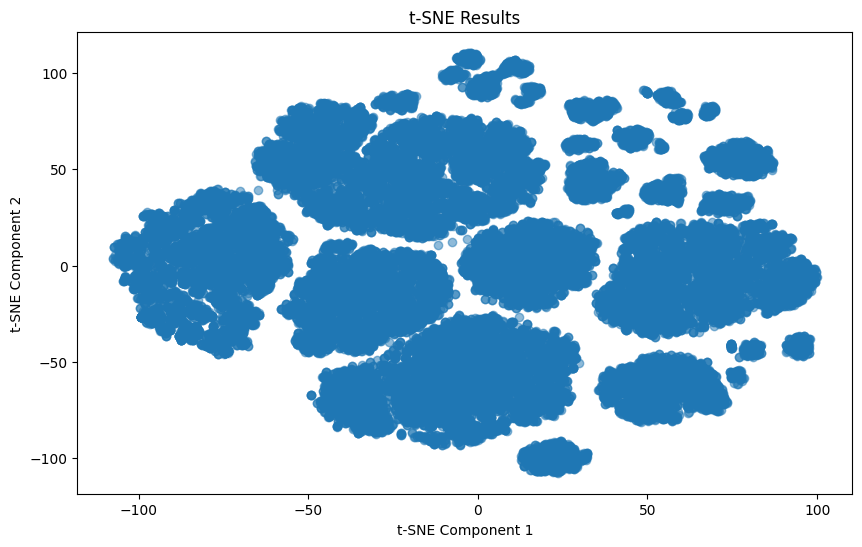

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE Results')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

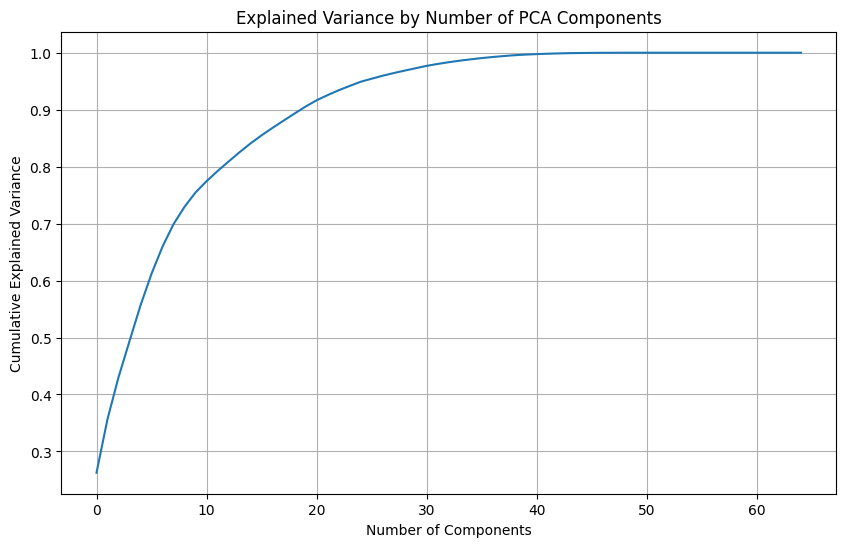

In [ ]:
pca = PCA().fit(df_preprocessed)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
plt.show()

In [ ]:
optimal_components = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0] + 1
print(f"Optimal number of PCA components: {optimal_components}")

Optimal number of PCA components: 26


# Part 4

In this project, we delved into a bank marketing dataset to uncover key insights. Our approach was methodical, splitting the analysis into Exploratory Data Analysis (EDA), Data Preparation (DP), and Dimensionality Reduction (DR).

Summary
1. EDA: We individually examined each feature to understand its characteristics and checked for anomalies. This included analyzing distributions and relationships between variables like age and job type.

2. DP: The dataset was refined by filling in missing values, handling outliers, and transforming data. This step was crucial to ensure the accuracy of our subsequent analysis.

3. DR: Using PCA and t-SNE, we reduced the dataset's dimensionality. PCA helped us retain 95% of the variance, and t-SNE offered a visual insight into the data’s structure. We also identified the optimal number of PCA components.

Conclusion
Our analysis provided valuable insights, particularly in understanding customer demographics and behavior. These findings could guide targeted marketing strategies. The cleaned and transformed dataset, complemented with dimensionality reduction, lays a solid foundation for future predictive modeling. This project highlights the importance of a structured analytical approach in extracting meaningful information from complex data.